<a href="https://colab.research.google.com/github/oriolrius/Simple-Python-Blockchain-Google-Colab/blob/main/blockchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!wget 'https://thispersondoesnotexist.com/image' \
  -O 'person.jpg'

--2022-10-04 20:13:26--  https://thispersondoesnotexist.com/image
Resolving thispersondoesnotexist.com (thispersondoesnotexist.com)... 172.67.130.241, 104.21.3.164, 2606:4700:3032::ac43:82f1, ...
Connecting to thispersondoesnotexist.com (thispersondoesnotexist.com)|172.67.130.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 507144 (495K) [image/jpeg]
Saving to: ‘person.jpg’

person.jpg          100%[===================>] 495.26K   999KB/s    in 0.5s    

2022-10-04 20:13:28 (999 KB/s) - ‘person.jpg’ saved [507144/507144]



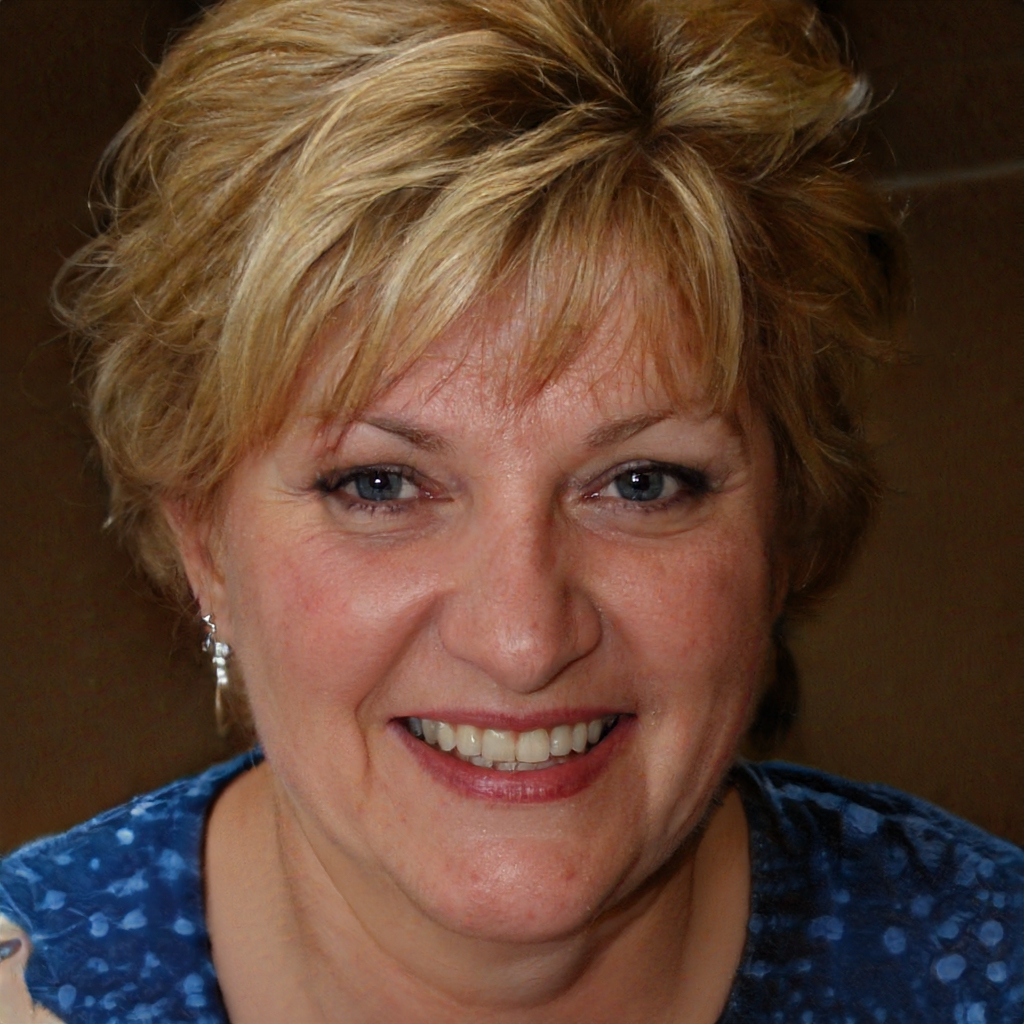

In [26]:
from IPython.display import Image
Image('person.jpg')

In [28]:
# SHA256 of 'person.jpg'
import hashlib

with open('person.jpg', 'rb') as f:
  bytes = f.read()
  hash = hashlib.sha256(bytes).hexdigest()
  print(hash)

099bf939687aa4a21388a182dd221106b8e6a0ceb7399c4bb84fec9a5c1202cf


In [ ]:
import locale
locale.setlocale(locale.LC_ALL, '') 

# maximum number of tries
f'{(2**32):n}'

'4,294,967,296'

In [ ]:
# difficulty
diff = 20
target = 2 ** (256-diff)
print('Binary:')
print(f'{(2**256)-1:0256b}')
print(f'{target-1:0256b}')
print('Hexadecimal:')
print(f'{(2**256)-1:064x}')
print(f'{target-1:064x}')

Binary:
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
0000000000000000000011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
Hexadecimal:
ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
00000fffffffffffffffffffffffffffffffffffffffffffffffffffffffffff


In [ ]:
import datetime
import hashlib
import random

class Block:
  blockNo = 0
  data = None
  next = None
  hash = None
  nonce = 0
  previous_hash = 0x0
  timestamp = datetime.datetime.now()

  def __init__(self, data):
    self.data = data

  def hash(self):
    h = hashlib.sha256()
    h.update(
    str(self.nonce).encode('utf-8') +
    str(self.data).encode('utf-8') +
    str(self.previous_hash).encode('utf-8') +
    str(self.timestamp).encode('utf-8') +
    str(self.blockNo).encode('utf-8')
    )
    return h.hexdigest()

  def __str__(self):
    return \
      "Block Hash: " + str(self.hash()) + "\n" + \
      "BlockNo: " + str(self.blockNo) + "\n" + \
      "Block Data: " + str(self.data) + "\n" + \
      "Iterations: " + str(self.nonce) + "\n" + \
      "Previous: " + str(self.previous_hash)[0:5] + "...\n" + \
      "--------------"

class Blockchain:
  diff = 20
  maxNonce = 2**32
  target = 2 ** (256-diff)

  block = Block("Genesis")
  dummy = head = block

  def add(self, block):
    block.previous_hash = self.block.hash()
    block.blockNo = self.block.blockNo + 1
    self.block.next = block
    self.block = self.block.next

  def mine(self, block):
    for n in range(self.maxNonce):
      if int(block.hash(), 16) <= self.target:
        self.add(block)
        print(block)
        break
      else:
        block.nonce += 1

blockchain = Blockchain()

for n in range(10):
  randomlist = random.sample(range(1000, 30000), 5)
  data = " ".join(map(lambda x: 'Transaction #' + str(x) + ",", randomlist))
  blockchain.mine(Block(f'Block {str(n+1)}: {data}'))

while blockchain.head != None:
  print(blockchain.head)
  blockchain.head = blockchain.head.next

Block Hash: ace9138aade34aed4ee394f030b6eaa8aa0a8830480fd45cd915987e61a6545b
BlockNo: 1
Block Data: Block 1: Transaction #18899, Transaction #10772, Transaction #12553, Transaction #13929, Transaction #8398,
Iterations: 562180
Previous: 7d9ef...
--------------
Block Hash: 8101149f5f923adf5feed00e6f1be92ca87cfa65e50d12961c38f4a4c6c7bf2c
BlockNo: 2
Block Data: Block 2: Transaction #27778, Transaction #9228, Transaction #9725, Transaction #4689, Transaction #1953,
Iterations: 144819
Previous: ace91...
--------------
Block Hash: b5ab36e9051d1a30c9edadb8aef25ea57234fb2509cad426a6a52fcda8695683
BlockNo: 3
Block Data: Block 3: Transaction #28790, Transaction #22436, Transaction #14126, Transaction #15446, Transaction #2664,
Iterations: 1950928
Previous: 81011...
--------------
Block Hash: 8d00b0be3a1c55205a54c9ac2805f3b66820db2873665fed556b1dc396e81eaf
BlockNo: 4
Block Data: Block 4: Transaction #5739, Transaction #7893, Transaction #8985, Transaction #11344, Transaction #3650,
Iterations: 74